In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from numpy.lib.shape_base import expand_dims

# De Jong's test suite

These functions represent the common difficulties in optimization problems in an isolated manner.By running the comparisons on the De Jong's test suite, one can make judgments about the strengths and weaknesses of particular algorithms. Also, De Jong's functions are quite popular in nonlinear optimization literature, so it is possible to make direct comparisons between several methods.

## De Jong function n. 2

Also known as **Rosenbrock** function, it is a nightmare since it has a very narrow ridge. The tip of the ridge is very sharp, and it runs around a parabola. Algorithms that are not able to discover good directions underperform in this problem. The **Rosenbrock** function is expressed by the following formula:

$$DF_2(\mathbb{x}) = \sum_{i = 1}^{N -1} (100 \cdot (x_{i + 1} - x_i^2)^2 + (x_i - 1)^2)$$

It can be evaluated in any $N$ dimensional space, with $N \in \mathbb{N}$. The domain $\mathbb{R}^N$ is bounded by the interval \[-5.12, 5.12\] for each dimension. The global minimum for any $N$ is:
$$\min(DJ_2)= DJ_2(1, ...,1) = 0$$ 

In [2]:
# definition of the De Jong function number 2
def DJ2(x):
  """
  the function takes as input a numpy array x with dimension (N, )
  It returns the evaluation of the De Jong function number 2.
  global minimum DF2(x*)=0
  global arg-minimum x*(i)=1,   i=1:N  
  """
  r = 0
  for i in range(x.shape[0] -1):
    r += 100 * (x[i + 1] - x[i]**2)**2 + (x[i] - 1)**2
  return r

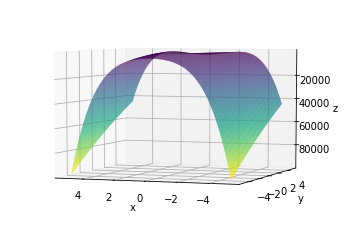

In [3]:
# 3D-plot of the De Jong function in a two dimensional space, recall that DF2 can be evaluated in any dimension N
x = np.linspace(-5.12, 5.12, 100) # it creates an array with 100 items equally spaced between -5.12, 5.12
y = np.linspace(-5.12, 5.12, 100) 
X, Y = np.meshgrid(x, y) # meshgrid copies vector x and y in such a way to create couples between each item in a grid

# data is an array with dimension (10000, 2) 
data = np.concatenate([np.expand_dims(X.flatten(), 1), np.expand_dims(Y.flatten(), 1)], 1)
Z = np.apply_along_axis(DJ2, 1, data).reshape(100, 100) # Z is the array with evaluation of all the points in the domain of DJ2

# plot the 3D function
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_trisurf(X.flatten(), Y.flatten(), Z.flatten(), cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(185, 70);

## De Jong function n. 3

Also known as **Step** function is the representative of the problems with flat surfaces. Flat surfaces are obstacles for optimization algorithms, because they do not give any information as to which direction is favorable. Unless an algorithm has variable step sizes, it can get stuck on one of the flat plateaus. The **Step** function is expressed as:

$$DJ_3(\mathbb{x}) = 6 \cdot N + \sum_{i=1}^{n-1} \lfloor x_i \rfloor$$


The function can be evaluated in any $N$ dimensional space, with $N \in \mathbb{N}$. The domain $\mathbb{R}^N$ is bounded by the interval \[-5.12, 5.12\] for each dimension. The global minimum for any $N$ is:
$$\min(DJ_3)= DJ_3([-5.12, -5), ...,[-5.12, -5)) = 0$$ 

where $[-5.12, -5)$ is the interval between -5.12 and -5. Therefore the **step** function has a global arg-minimum that is a flat surface.

In [4]:
# definition of the De Jong function number 3
def DJ3(x):
  """
  the function takes as input a numpy array x with dimension (N, )
  It returns the evaluation of the De Jong function number 3.
  global minimum DJ3(x*)=0
  global arg-minimum x*(i)=[-5.12, -5),   i=1:N
  """
  return 6*len(x) + np.sum(np.ceil(x))

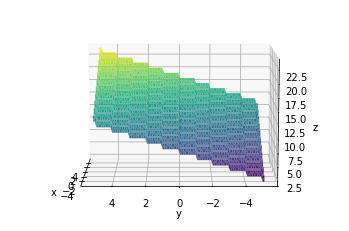

In [5]:
# 3D-plot of the De Jong function in a two dimensional space, recall that DF3 can be evaluated in any dimension N
x = np.linspace(-5.12, 5.12, 100) # it creates an array with 100 items equally spaced between -5.12, 5.12
y = np.linspace(-5.12, 5.12, 100) 
X, Y = np.meshgrid(x, y) # meshgrid copies vector x and y in such a way to create couples between each item in a grid

# data is an array with dimension (10000, 2) 
data = np.concatenate([np.expand_dims(X.flatten(), 1), np.expand_dims(Y.flatten(), 1)], 1)
Z = np.apply_along_axis(DJ3, 1, data).reshape(100, 100) # Z is the array with evaluation of all the points in the domain of DJ3

# plot the 3D function
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_trisurf(X.flatten(), Y.flatten(), Z.flatten(), cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 180);

## De Jong function n. 5 
The **Foxholes** is an example of many (in this case 25) local optima. Many standard optimization algorithms get stuck in the first peak they find. The function is expressed by:

$$DJ_5(\mathbb{x}) = \bigg(\frac{1}{500} + \sum_{i=1}^{25} \frac{1}{i + (x_1 - a_{1i})^6 + (x_2 - a_{2i})^6}\bigg)^{-1}$$

with $\mathbb{a}$ being a $2 \times 25$ matrix, and $a_{1i}$ being the element in the first row and $i$th column of the matrix.

$$\mathbb{a} = \begin{pmatrix} 
	-32 & -16 & 0 & 16 & 32 & -32 & ... & 0 & 16 & 32 \\
	-32 & -32 & -32 & -32 & - 32 & -16 & ... & 32 & 32 & 32\\
	\end{pmatrix} $$

The **Foxholes** function can be evaluated just in a $2$ dimensional space. The domain $\mathbb{R}^2$ is bounded by the interval \[-65.536, 65.536\] for each dimension. The global minimum is:
$$\min(DJ_5)= DJ_5(-32, -32) \approx 1$$

and the approximation $DF_5(a_{1i}, a_{2i}) \approx i$ is generally valid in the domain.

In [6]:
# definition of the De Jong function number 5

# matrix a creation
a_up = np.tile([-32, -16, 0, 16, 32], 5)
a_down = np.transpose(np.tile([-32, -16, 0, 16, 32], (5, 1))).flatten()
a = np.stack([a_up, a_down])


def DJ5(x):
  """
  the function takes as input a numpy array x with dimension (2, )
  It returns the evaluation of the De Jong function number 5.   
  global minimum DJ5(x*)=1
  global arg-minimum x*(0)=-32, x*(1)=-32  
  """
  d = 0.002
  for i in range(25):
    d += 1 / (i + 1 + (x[0] - a[0][i]) ** 6 + (x[1] - a[1][i]) ** 6)
  return 1 / d

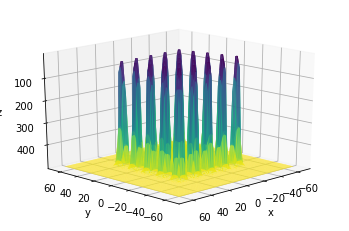

In [7]:
# 3D-plot of the De Jong function in a two dimensional space
x = np.linspace(-65.536, 65.536, 100)
y = np.linspace(-65.536, 65.536, 100)
X, Y = np.meshgrid(x, y)

data = np.concatenate([np.expand_dims(X.flatten(), 1), np.expand_dims(Y.flatten(), 1)], 1)
Z = np.apply_along_axis(DJ5, 1, data).reshape(100, 100)

# plot the 3D function
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_trisurf(X.flatten(), Y.flatten(), Z.flatten(), cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(-160, 135);

# Meta-Heuristic

In computer science and mathematical optimization, a metaheuristic is a higher-level procedure or heuristic designed to find, generate, or select a heuristic (partial search algorithm) that may provide a sufficiently good solution to an optimization problem, especially with incomplete or imperfect information or limited computation capacity. Metaheuristics sample a subset of solutions which is otherwise too large to be completely enumerated or otherwise explored. Metaheuristics may make relatively few assumptions about the optimization problem being solved and so may be usable for a variety of problems.

## Particle Swarm Optimization

In computational science, particle swarm optimization (PSO)[1] is a computational method that optimizes a problem by iteratively trying to improve a candidate solution with regard to a given measure of quality. It solves a problem by having a population of candidate solutions, here dubbed particles, and moving these particles around in the search-space according to simple mathematical formula over the particle's position and velocity. Each particle's movement is influenced by its local best known position, but is also guided toward the best known positions in the search-space, which are updated as better positions are found by other particles. This is expected to move the swarm toward the best solutions.


In [8]:
#install the library used to run the Particle Swarm Optimization
!pip install pyswarms

     |████████████████████████████████| 104 kB 14.7 MB/s 


In [9]:
from attr.validators import max_len
from time import time
import pandas as pd
from IPython.display import HTML
import pyswarms as ps


dimension = 2
fun = DJ2
vfun = lambda data: np.apply_along_axis(fun, 1, data)
real_opt = 0

tolerance = 1e-9
value_bound = 2.048
max_bound  = value_bound * np.ones(dimension)
min_bound = -max_bound
bnds = (min_bound, max_bound)
n_particles = 10 * dimension
iterations = 10000

# Set-up hyperparameters
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}

# Call instance of PSO
optimizer = ps.single.GlobalBestPSO(n_particles=n_particles, dimensions=dimension, 
                                    options=options, bounds=bnds)

# Perform optimization
cost, pos = optimizer.optimize(vfun, iters=iterations)
print(cost, pos)

2022-05-22 22:59:31,361 - pyswarms.single.global_best - INFO - Optimize for 10000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|10000/10000, best_cost=0
2022-05-22 23:00:01,003 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0, best pos: [1. 1.]


0.0 [1. 1.]


In [10]:
# let's make some statistics
data_experiments = {"dimension": [2, 3, 4, 5, 6, 7, 8, 9,10],  
                    "avg fev":[],
                    "std fev": [],
                    "success rate": [],
                    "avg nfev": [],
                    "std nfev": [],
                    "avg iter": []
                    }

start = time()
for dimension in data_experiments["dimension"]:
  succes_rate = 0
  avg_fun = []
  avg_nfev = []
  avg_it = []
  max_bound  = value_bound * np.ones(dimension)
  min_bound = -max_bound
  bnds = (min_bound, max_bound)
  n_particles = 10 * dimension
  
  for _ in range(10):
    optimizer = ps.single.GlobalBestPSO(n_particles=n_particles, 
                                        dimensions=dimension,
                                        options=options, 
                                        bounds=bnds)
    cost, pos = optimizer.optimize(vfun, iters=1000, verbose=False)
    avg_fun.append(cost)
    avg_nfev.append(iterations*n_particles)
    avg_it.append(iterations)
    if np.abs(cost - real_opt) < 1e-6:
      succes_rate += 1
     
  data_experiments["success rate"].append(f"{succes_rate}/10")
  data_experiments["avg fev"].append(np.mean(avg_fun))
  data_experiments["std fev"].append(np.std(avg_fun))
  data_experiments["avg nfev"].append(np.mean(avg_nfev))
  data_experiments["std nfev"].append(np.std(avg_nfev))
  data_experiments["avg iter"].append(np.mean(avg_it))

print("total time used for the experiments: ", round(time() - start, 2))

table = pd.DataFrame(data_experiments)
HTML(table.to_html(index=False))

total time used for the experiments:  106.28


dimension,avg fev,std fev,success rate,avg nfev,std nfev,avg iter
2,9.409728e-20,1.772558e-19,10/10,200000.0,0.0,10000.0
3,1.907108e-03,5.034124e-03,7/10,300000.0,0.0,10000.0
4,2.485726e-03,7.426914e-03,4/10,400000.0,0.0,10000.0
5,8.611854e-03,2.575284e-02,0/10,500000.0,0.0,10000.0
6,4.032766e-01,1.206758e+00,0/10,600000.0,0.0,10000.0
7,1.922577e-01,5.523731e-01,0/10,700000.0,0.0,10000.0
8,8.900620e-01,9.005150e-01,0/10,800000.0,0.0,10000.0
9,8.760253e-01,8.008395e-01,0/10,900000.0,0.0,10000.0
10,1.823910e+00,2.108666e+00,0/10,1000000.0,0.0,10000.0


In [11]:
# Now it's the time to implement the Coordinate Descent on functions n.2 and n.5

## Genetic Algorithm

In computer science and operations research, a genetic algorithm (GA) is a metaheuristic inspired by the process of natural selection that belongs to the larger class of evolutionary algorithms (EA). Genetic algorithms are commonly used to generate high-quality solutions to optimization and search problems by relying on biologically inspired operators such as mutation, crossover and selection. Some examples of GA applications include optimizing decision trees for better performance, solving sudoku puzzles, hyperparameter optimization, etc.

In [12]:
!pip install pygad

     |████████████████████████████████| 53 kB 1.9 MB/s 


In [13]:

from time import time
import pandas as pd
from IPython.display import HTML
import pygad



dimension = 2
fun = DJ2
real_opt = 0
tolerance = 1e-9
bnds = [-2.048, 2.048]

def fitness_func(solution, solution_idx):
    output = fun(solution)
    fitness = - np.abs(output - real_opt)
    return fitness

fitness_function = fitness_func

num_generations = 10000
num_parents_mating = 4

sol_per_pop = 20 * dimension
num_genes = dimension

value_bound = 2.048
max_bound  = value_bound 
min_bound = -max_bound

parent_selection_type = "sss"
keep_parents = 1

crossover_type = "single_point"

mutation_type = None
mutation_percent_genes = 1

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       init_range_low=min_bound,
                       init_range_high=max_bound,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes)

ga_instance.run()

solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

Parameters of the best solution : [0.59292876 0.24344736]
Fitness value of the best solution = -1.334638965633436


In [14]:
# let's make some statistics

data_experiments = {"dimension": [2, 3, 4, 5, 6, 7, 8, 9,10],  
                    "avg fev":[],
                    "std fev": [],
                    "success rate": [],
                    "avg nfev": [],
                    "std nfev": [],
                    "avg iter": []
                    }

start = time()
for dimension in data_experiments["dimension"]:
  succes_rate = 0
  avg_fun = []
  avg_nfev = []
  avg_it = []
  for _ in range(10):
    ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       init_range_low=min_bound,
                       init_range_high=max_bound,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes)

    ga_instance.run()

    solution, solution_fitness, solution_idx = ga_instance.best_solution()

    cost = fun(solution)
    avg_fun.append(cost)
    avg_nfev.append(num_generations*sol_per_pop)
    avg_it.append(num_generations)
    if np.abs(cost - real_opt) < 1e-6:
      succes_rate += 1
     
  data_experiments["success rate"].append(f"{succes_rate}/10")
  data_experiments["avg fev"].append(np.mean(avg_fun))
  data_experiments["std fev"].append(np.std(avg_fun))
  data_experiments["avg nfev"].append(np.mean(avg_nfev))
  data_experiments["std nfev"].append(np.std(avg_nfev))
  data_experiments["avg iter"].append(np.mean(avg_it))

print("total time used for the experiments: ", round(time() - start, 2))

table = pd.DataFrame(data_experiments)
HTML(table.to_html(index=False))

total time used for the experiments:  1081.83


dimension,avg fev,std fev,success rate,avg nfev,std nfev,avg iter
2,1.499543,1.162222,0/10,400000.0,0.0,10000.0
3,0.954665,1.972224,0/10,400000.0,0.0,10000.0
4,1.800421,2.357974,0/10,400000.0,0.0,10000.0
5,1.289485,1.659945,0/10,400000.0,0.0,10000.0
6,1.353138,1.112786,0/10,400000.0,0.0,10000.0
7,1.348154,1.690039,0/10,400000.0,0.0,10000.0
8,0.967022,0.530160,0/10,400000.0,0.0,10000.0
9,1.411438,1.625601,0/10,400000.0,0.0,10000.0
10,1.644910,1.293415,0/10,400000.0,0.0,10000.0


In [15]:
# Now it's the time to implement the Coordinate Descent on functions n.2 and n.5